<a href="https://colab.research.google.com/github/bekykm/Detection-of-False-Position-Attacks-in-VANETs-through-Bagging-Ensemble-Learning/blob/main/False_position_detection_using_KNN_with_Ensemble_bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Appendix 1: Sample Code of KNN with Bagging**


ATTACK 1

Mean Precision: 100.0
Mean Recall: 100.0
Mean Accuracy: 100.0
Mean F1: 100.0


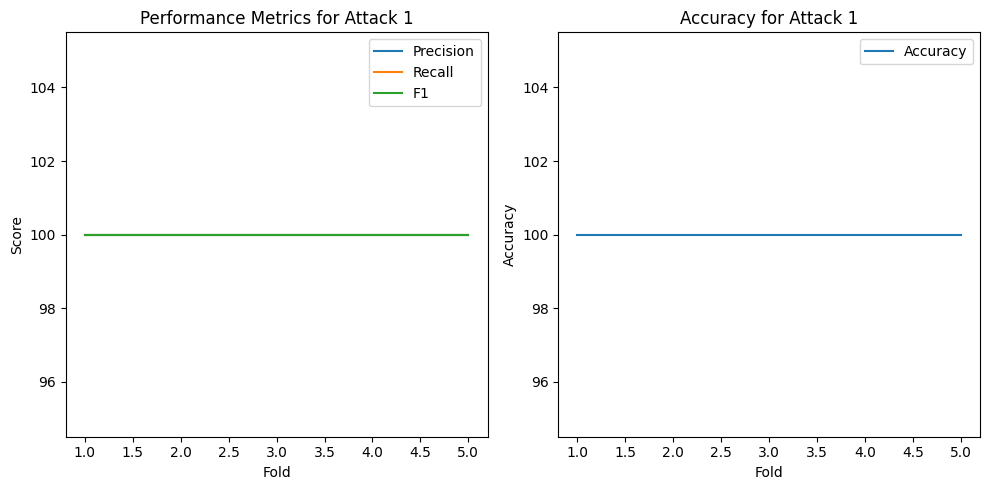


ATTACK 2

Mean Precision: 99.87728071308014
Mean Recall: 99.87727704432052
Mean Accuracy: 99.87727704432052
Mean F1: 99.8772587910153


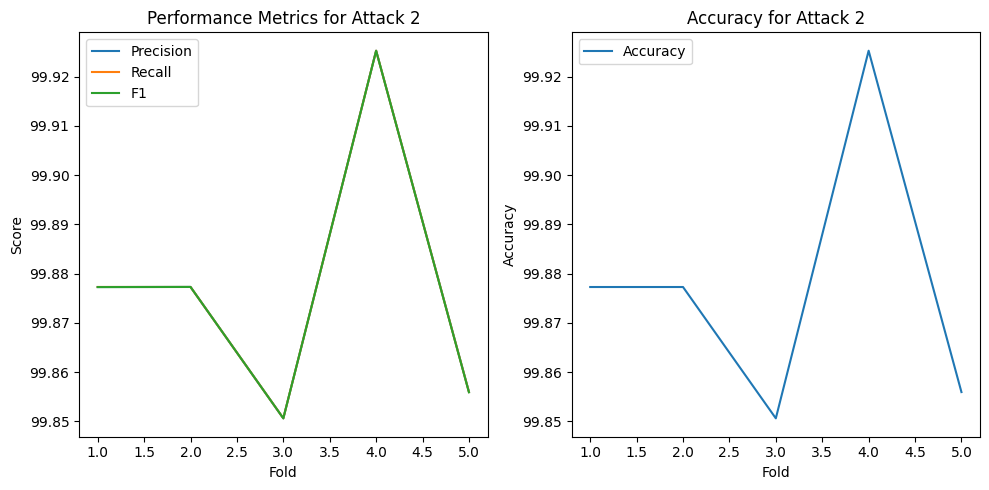


ATTACK 4

Mean Precision: 99.95746118023943
Mean Recall: 99.95743484819613
Mean Accuracy: 99.95743484819613
Mean F1: 99.95742678925342


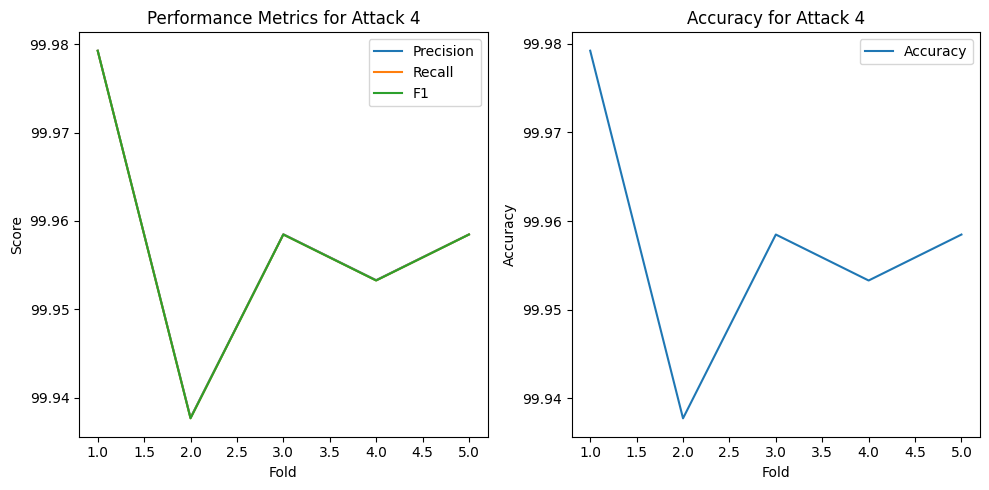


ATTACK 8

Mean Precision: 99.12377466226643
Mean Recall: 99.11290436044499
Mean Accuracy: 99.11290436044499
Mean F1: 99.10922647379769


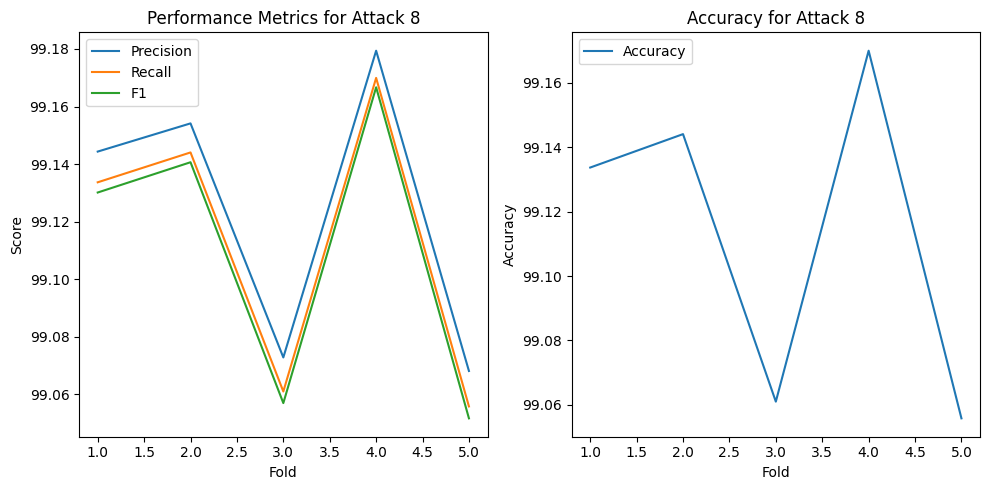


ATTACK 16

Mean Precision: 97.84783023929745
Mean Recall: 97.85338510696988
Mean Accuracy: 97.85338510696988
Mean F1: 97.84670199673504


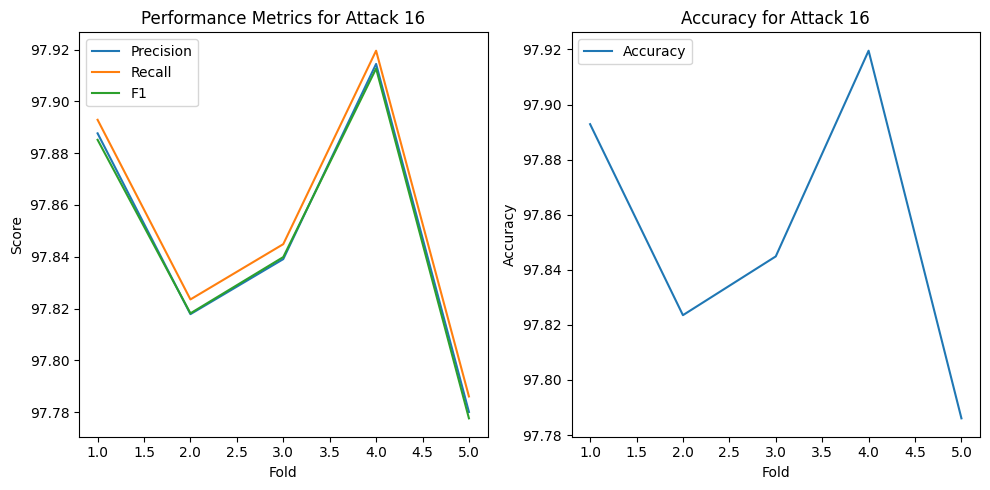

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from statistics import mean
import matplotlib.pyplot as plt

# Load datasets
dataset1 = pd.read_csv('/content/drive/MyDrive/at1.csv')
dataset2 = pd.read_csv('/content/drive/MyDrive/at2.csv')
dataset4 = pd.read_csv('/content/drive/MyDrive/at4.csv')
dataset8 = pd.read_csv('/content/drive/MyDrive/at8.csv')
dataset16 = pd.read_csv('/content/drive/MyDrive/at16.csv')

# Define function for dataset processing
def dataset_twoBSM(dataset, n):
    dataset = dataset.sample(frac=1).reset_index(drop=True) # Shuffle the dataset
    output = dataset[['pos-x1','pos-y1','spd-x1','spd-y1','pos-x2','pos-y2','spd-x2','spd-y2','AttackerType']]
    output1 = output.drop_duplicates()  # Remove duplicates
    X = output1[['pos-x1','pos-y1','spd-x1','spd-y1','pos-x2','pos-y2','spd-x2','spd-y2']]
    Y = output1['AttackerType'] / n  # Normalize AttackerType by 'n'
    return X, Y

# Define function for k-fold cross-validation
def datasetkfold(X, Y):
    kf = KFold(n_splits=5, shuffle=True)
    precision_mean = []
    recall_mean = []
    accuracy_mean = []
    F1_mean = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
        precision, recall, accuracy, F1 = score(X_train, Y_train, X_test, Y_test)
        precision_mean.append(precision)
        recall_mean.append(recall)
        accuracy_mean.append(accuracy)
        F1_mean.append(F1)

    return precision_mean, recall_mean, accuracy_mean, F1_mean

# Define function for scoring
def score(xtrain, ytrain, xtest, ytest):
    base_classifier = KNeighborsClassifier(n_neighbors=3, weights='distance')
    bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=0)
    bagging_classifier.fit(xtrain, ytrain)
    pred = bagging_classifier.predict(xtest)

    # Calculate metrics
    cm = confusion_matrix(ytest, pred)
    precision = precision_score(ytest, pred, average='weighted')
    recall = recall_score(ytest, pred, average='weighted')
    accuracy = accuracy_score(ytest, pred)
    F1 = f1_score(ytest, pred, average='weighted')

    return precision * 100, recall * 100, accuracy * 100, F1 * 100

# Process datasets
datasets = [(dataset1, 1), (dataset2, 2), (dataset4, 4), (dataset8, 8), (dataset16, 16)]

for dataset, n in datasets:
    X, Y = dataset_twoBSM(dataset, n)
    precision_mean, recall_mean, accuracy_mean, F1_mean = datasetkfold(X, Y)

    # Output results for each attack type
    print(f"\nATTACK {n}\n")
    print(f"Mean Precision: {mean(precision_mean)}")
    print(f"Mean Recall: {mean(recall_mean)}")
    print(f"Mean Accuracy: {mean(accuracy_mean)}")
    print(f"Mean F1: {mean(F1_mean)}")

    # Plot results for each attack type
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)

    # Plot Precision, Recall, and F1 scores
    plt.plot(range(1, 6), precision_mean, label='Precision')
    plt.plot(range(1, 6), recall_mean, label='Recall')
    plt.plot(range(1, 6), F1_mean, label='F1')

    # Add labels and titles # This is where the changes go
    plt.xlabel('Fold')
    plt.ylabel('Score')
    plt.title('Performance Metrics for Attack {}'.format(n)) # Added title with Attack type
    plt.legend()

    plt.subplot(1, 2, 2)  # Creating a second subplot for accuracy
    plt.plot(range(1, 6), accuracy_mean, label='Accuracy')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title('Accuracy for Attack {}'.format(n)) # Added title with Attack type
    plt.legend()

    plt.tight_layout() # Adjusts subplot params so that the subplot(s) fits in to the figure area.
    plt.show()


You want to apply the same structure as before, but now using a K-Nearest Neighbors classifier (KNeighborsClassifier) with a BaggingClassifier. The changes are minor but important, mainly replacing the decision tree or random forest classifier with the KNN classifier. Here's how you can apply the changes to your code.


ATTACK 1

Mean Precision: 100.0
Mean Recall: 100.0
Mean Accuracy: 100.0
Mean F1: 100.0

ATTACK 2

Mean Precision: 99.88049519958712
Mean Recall: 99.88047806859362
Mean Accuracy: 99.88047806859362
Mean F1: 99.88047308864338

ATTACK 4

Mean Precision: 99.96057747169375
Mean Recall: 99.96054898111926
Mean Accuracy: 99.96054898111926
Mean F1: 99.96054064791905

ATTACK 8

Mean Precision: 99.09619700651868
Mean Recall: 99.0848912184604
Mean Accuracy: 99.0848912184604
Mean F1: 99.0809942651127

ATTACK 16

Mean Precision: 97.81048172388661
Mean Recall: 97.81604386440887
Mean Accuracy: 97.81604386440887
Mean F1: 97.80887270151446


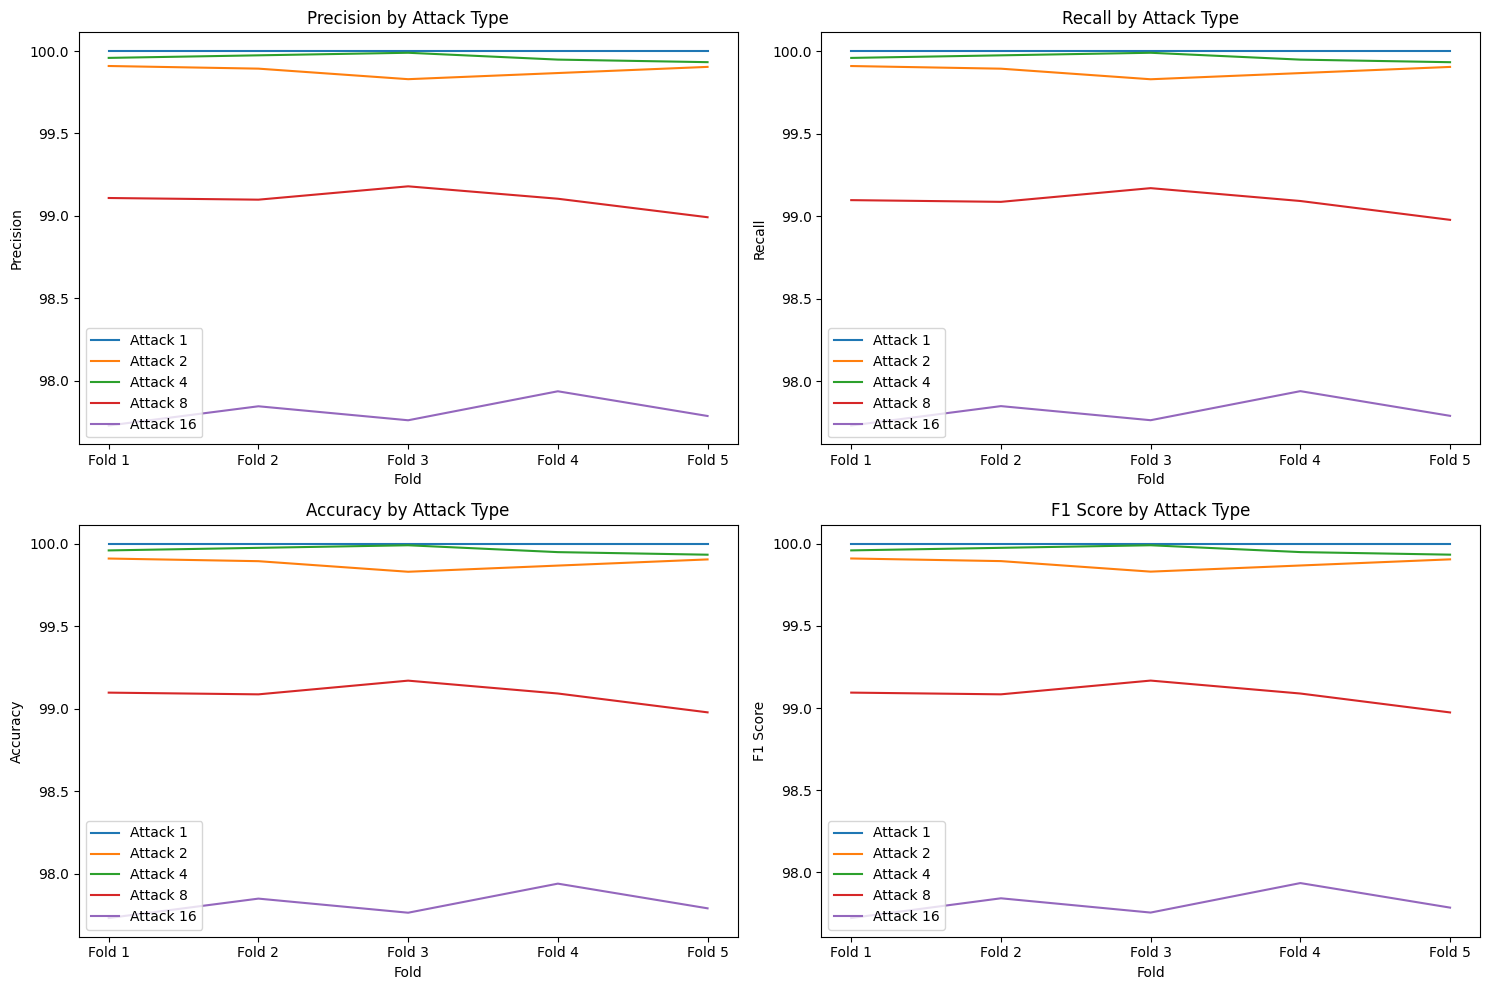

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from statistics import mean
import matplotlib.pyplot as plt

# Load datasets
dataset1 = pd.read_csv('/content/drive/MyDrive/at1.csv')
dataset2 = pd.read_csv('/content/drive/MyDrive/at2.csv')
dataset4 = pd.read_csv('/content/drive/MyDrive/at4.csv')
dataset8 = pd.read_csv('/content/drive/MyDrive/at8.csv')
dataset16 = pd.read_csv('/content/drive/MyDrive/at16.csv')

# Define function for dataset processing
def dataset_twoBSM(dataset, n):
    dataset = dataset.sample(frac=1).reset_index(drop=True)
    output = dataset[['pos-x1','pos-y1','spd-x1','spd-y1','pos-x2','pos-y2','spd-x2','spd-y2','AttackerType']]
    output1 = output.drop_duplicates()
    X = output1[['pos-x1','pos-y1','spd-x1','spd-y1','pos-x2','pos-y2','spd-x2','spd-y2']]
    Y = output1['AttackerType'] / n
    return X, Y

# Define function for k-fold cross-validation
def datasetkfold(X, Y):
    kf = KFold(n_splits=5, shuffle=True)
    precision_mean = []
    recall_mean = []
    accuracy_mean = []
    F1_mean = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
        precision, recall, accuracy, F1 = score(X_train, Y_train, X_test, Y_test)
        precision_mean.append(precision)
        recall_mean.append(recall)
        accuracy_mean.append(accuracy)
        F1_mean.append(F1)
    return precision_mean, recall_mean, accuracy_mean, F1_mean

# Define function for scoring
def score(xtrain, ytrain, xtest, ytest):
    # K-Nearest Neighbors with distance weighting
    base_classifier = KNeighborsClassifier(n_neighbors=3, weights='distance')
    bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=0)
    bagging_classifier.fit(xtrain, ytrain)
    pred = bagging_classifier.predict(xtest)

    precision = precision_score(ytest, pred, average='weighted')
    recall = recall_score(ytest, pred, average='weighted')
    accuracy = accuracy_score(ytest, pred)
    F1 = f1_score(ytest, pred, average='weighted')

    return precision * 100, recall * 100, accuracy * 100, F1 * 100

# Process datasets
datasets = [(dataset1, 1), (dataset2, 2), (dataset4, 4), (dataset8, 8), (dataset16, 16)]

# Store results for plotting later
precision_all = []
recall_all = []
accuracy_all = []
f1_all = []
attack_labels = []

# Process each dataset
for dataset, n in datasets:
    X, Y = dataset_twoBSM(dataset, n)
    precision_mean, recall_mean, accuracy_mean, F1_mean = datasetkfold(X, Y)

    # Append the results for plotting
    precision_all.append(precision_mean)
    recall_all.append(recall_mean)
    accuracy_all.append(accuracy_mean)
    f1_all.append(F1_mean)
    attack_labels.append(f'Attack {n}')

    # Output results for each dataset
    print(f"\nATTACK {n}\n")
    print(f"Mean Precision: {mean(precision_mean)}")
    print(f"Mean Recall: {mean(recall_mean)}")
    print(f"Mean Accuracy: {mean(accuracy_mean)}")
    print(f"Mean F1: {mean(F1_mean)}")

# Now, let's plot the results
x = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot Precision
for i, precision in enumerate(precision_all):
    axes[0, 0].plot(x, precision, label=attack_labels[i])
axes[0, 0].set_title('Precision by Attack Type')
axes[0, 0].set_xlabel('Fold')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].legend()

# Plot Recall
for i, recall in enumerate(recall_all):
    axes[0, 1].plot(x, recall, label=attack_labels[i])
axes[0, 1].set_title('Recall by Attack Type')
axes[0, 1].set_xlabel('Fold')
axes[0, 1].set_ylabel('Recall')
axes[0, 1].legend()

# Plot Accuracy
for i, accuracy in enumerate(accuracy_all):
    axes[1, 0].plot(x, accuracy, label=attack_labels[i])
axes[1, 0].set_title('Accuracy by Attack Type')
axes[1, 0].set_xlabel('Fold')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].legend()

# Plot F1 Score
for i, f1 in enumerate(f1_all):
    axes[1, 1].plot(x, f1, label=attack_labels[i])
axes[1, 1].set_title('F1 Score by Attack Type')
axes[1, 1].set_xlabel('Fold')
axes[1, 1].set_ylabel('F1 Score')
axes[1, 1].legend()

plt.tight_layout()
plt.show()


**Appendix 2: Sample Code of Decision Tree with Bagging**


ATTACK 1

Mean Precision: 99.99786334735458
Mean Recall: 99.99786296246675
Mean Accuracy: 99.99786296246675
Mean F1: 99.99786301811693


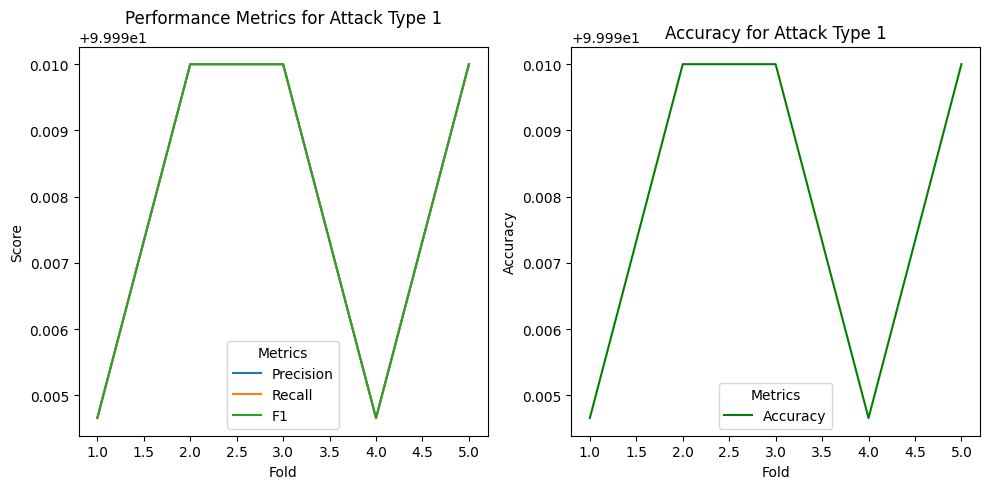


ATTACK 2

Mean Precision: 99.80585514197733
Mean Recall: 99.80577742375209
Mean Accuracy: 99.80577742375209
Mean F1: 99.80567305456096


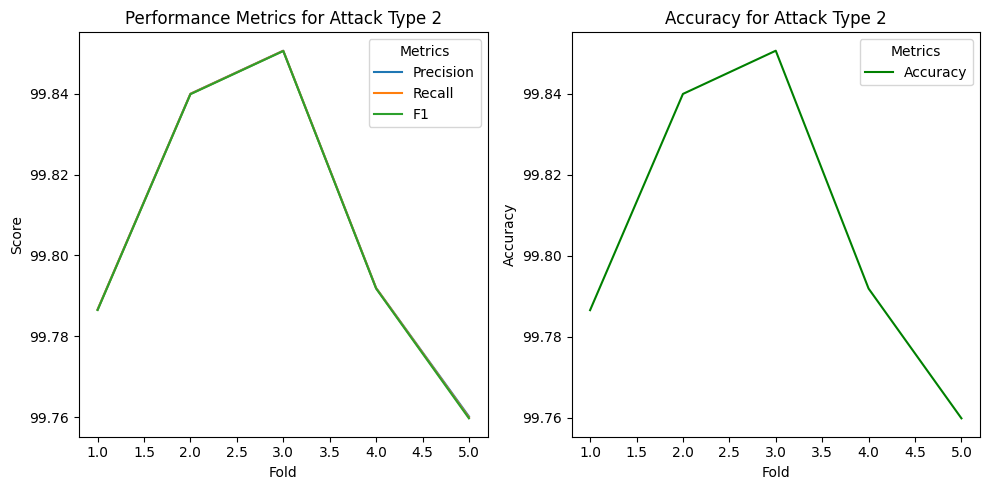


ATTACK 4

Mean Precision: 99.98028113572994
Mean Recall: 99.98027473306817
Mean Accuracy: 99.98027473306817
Mean F1: 99.98027290584928


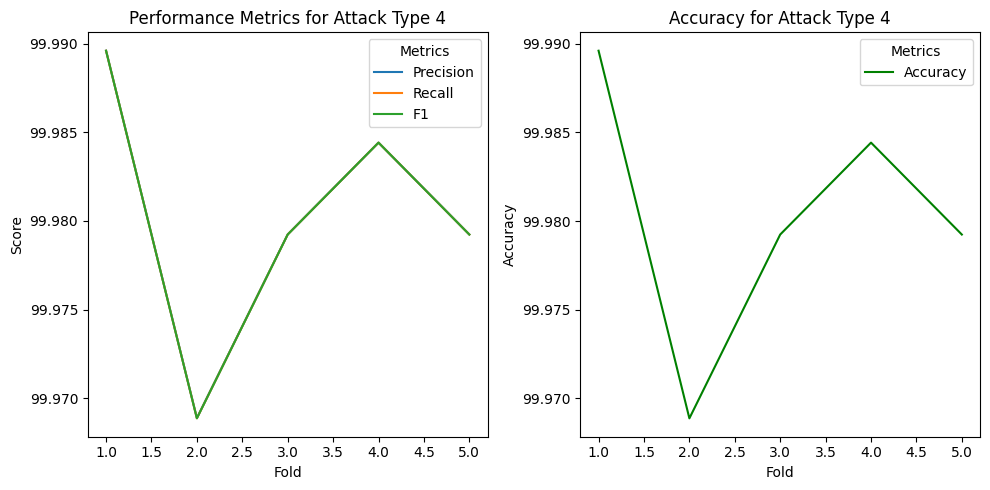


ATTACK 8

Mean Precision: 99.22055195971922
Mean Recall: 99.21562142116059
Mean Accuracy: 99.21562142116059
Mean F1: 99.21327088217075


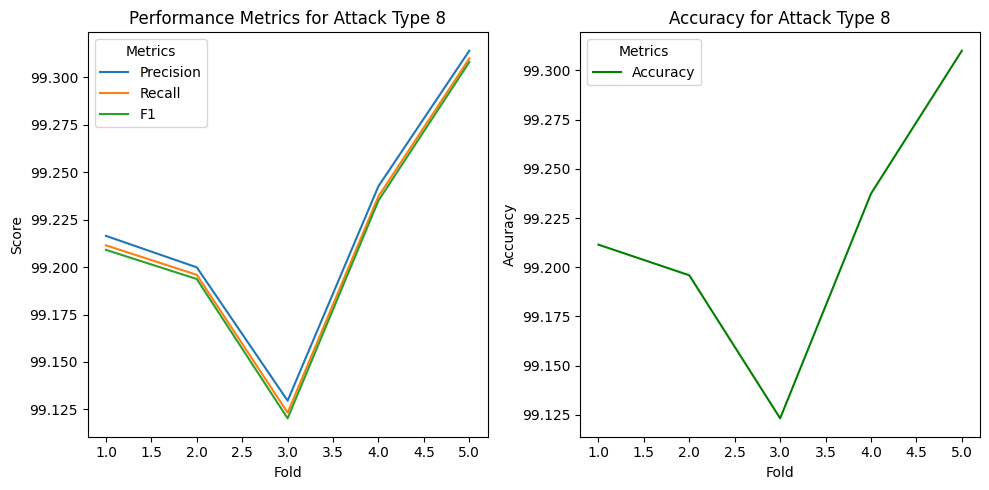


ATTACK 16

Mean Precision: 97.75127298335168
Mean Recall: 97.75523032181248
Mean Accuracy: 97.75523032181248
Mean F1: 97.74492076974592


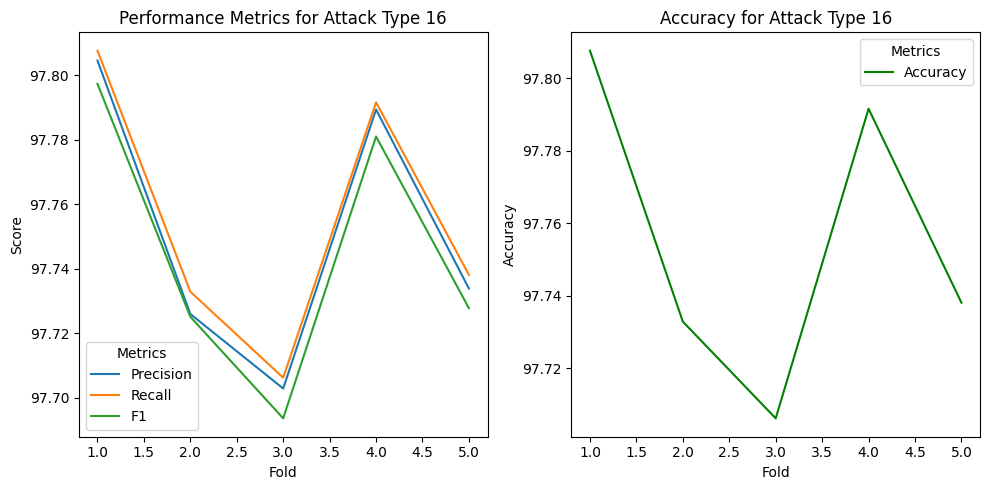

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from statistics import mean
import matplotlib.pyplot as plt
import pandas as pd

# Load datasets
dataset1 = pd.read_csv('/content/drive/MyDrive/at1.csv')
dataset2 = pd.read_csv('/content/drive/MyDrive/at2.csv')
dataset4 = pd.read_csv('/content/drive/MyDrive/at4.csv')
dataset8 = pd.read_csv('/content/drive/MyDrive/at8.csv')
dataset16 = pd.read_csv('/content/drive/MyDrive/at16.csv')

# Define function for dataset processing
def dataset_twoBSM(dataset, n):
    dataset = dataset.sample(frac=1).reset_index(drop=True)
    output = dataset[['pos-x1','pos-y1','spd-x1','spd-y1','pos-x2','pos-y2','spd-x2','spd-y2','AttackerType']]
    output1 = output.drop_duplicates()
    X = output1[['pos-x1','pos-y1','spd-x1','spd-y1','pos-x2','pos-y2','spd-x2','spd-y2']]
    Y = output1['AttackerType'] / n
    return X, Y

# Define function for k-fold cross-validation
def datasetkfold(X, Y):
    kf = KFold(n_splits=5, shuffle=True)
    precision_mean = []
    recall_mean = []
    accuracy_mean = []
    F1_mean = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
        precision, recall, accuracy, F1 = score(X_train, Y_train, X_test, Y_test)
        precision_mean.append(precision)
        recall_mean.append(recall)
        accuracy_mean.append(accuracy)
        F1_mean.append(F1)

    return precision_mean, recall_mean, accuracy_mean, F1_mean

# Define function for scoring
def score(xtrain, ytrain, xtest, ytest):
    # Replaced KNN with DecisionTreeClassifier
    base_classifier = DecisionTreeClassifier(random_state=0)
    bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=0)
    bagging_classifier.fit(xtrain, ytrain)
    pred = bagging_classifier.predict(xtest)

    # Calculate metrics
    cm = confusion_matrix(ytest, pred)
    precision = precision_score(ytest, pred, average='weighted')
    recall = recall_score(ytest, pred, average='weighted')
    accuracy = accuracy_score(ytest, pred)
    F1 = f1_score(ytest, pred, average='weighted')

    return precision * 100, recall * 100, accuracy * 100, F1 * 100

# Process datasets
datasets = [(dataset1, 1), (dataset2, 2), (dataset4, 4), (dataset8, 8), (dataset16, 16)]
for dataset, n in datasets:
    X, Y = dataset_twoBSM(dataset, n)
    precision_mean, recall_mean, accuracy_mean, F1_mean = datasetkfold(X, Y)

    # Output results for each attack type
    print(f"\nATTACK {n}\n")
    print(f"Mean Precision: {mean(precision_mean)}")
    print(f"Mean Recall: {mean(recall_mean)}")
    print(f"Mean Accuracy: {mean(accuracy_mean)}")
    print(f"Mean F1: {mean(F1_mean)}")

    # Plot results for each attack type
    plt.figure(figsize=(10, 5))

    # Plot Precision, Recall, and F1 scores
    plt.subplot(1, 2, 1)
    plt.plot(range(1, 6), precision_mean, label='Precision')
    plt.plot(range(1, 6), recall_mean, label='Recall')
    plt.plot(range(1, 6), F1_mean, label='F1')
    plt.xlabel('Fold')
    plt.ylabel('Score')
    plt.title(f'Performance Metrics for Attack Type {n}')
    plt.legend(title='Metrics')

    # Plot Accuracy score
    plt.subplot(1, 2, 2)
    plt.plot(range(1, 6), accuracy_mean, label='Accuracy', color='green')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy for Attack Type {n}')
    plt.legend(title='Metrics')

    plt.tight_layout()
    plt.show()


It seems you want to visualize the precision, recall, accuracy, and F1-score across different datasets (at1.csv, at2.csv, at4.csv, at8.csv, and at16.csv) for each fold of cross-validation. You already have a system set up for cross-validation and scoring, but now you want to plot these metrics separately for each attack type.


ATTACK 1

Mean Precision: 99.99893164480572
Mean Recall: 99.99893145269007
Mean Accuracy: 99.99893145269007
Mean F1: 99.99893148041721

ATTACK 2

Mean Precision: 99.79618949022887
Mean Recall: 99.79617252883668
Mean Accuracy: 99.79617252883668
Mean F1: 99.79608609899952

ATTACK 4

Mean Precision: 99.98754463408274
Mean Recall: 99.98754179769313
Mean Accuracy: 99.98754179769313
Mean F1: 99.98754097216296

ATTACK 8

Mean Precision: 99.22520601888884
Mean Recall: 99.21977096009108
Mean Accuracy: 99.21977096009108
Mean F1: 99.21735261746998

ATTACK 16

Mean Precision: 97.797424232028
Mean Recall: 97.80110580788043
Mean Accuracy: 97.80110580788043
Mean F1: 97.79092841704944


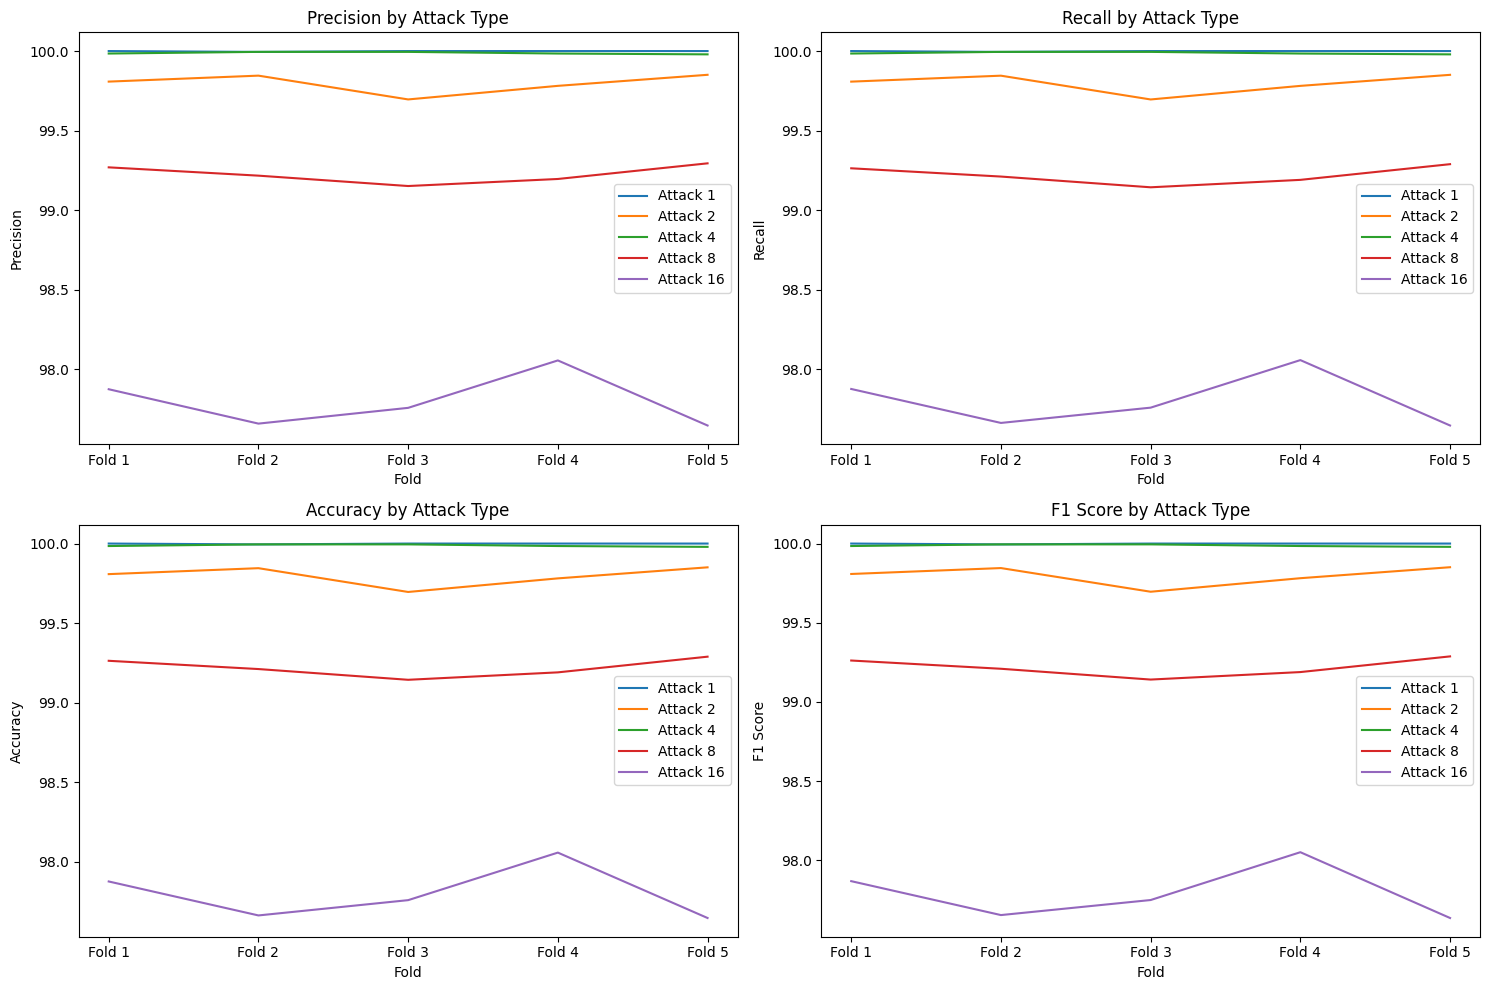

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import KFold
from statistics import mean

# Load datasets
dataset1 = pd.read_csv('/content/drive/MyDrive/at1.csv')
dataset2 = pd.read_csv('/content/drive/MyDrive/at2.csv')
dataset4 = pd.read_csv('/content/drive/MyDrive/at4.csv')
dataset8 = pd.read_csv('/content/drive/MyDrive/at8.csv')
dataset16 = pd.read_csv('/content/drive/MyDrive/at16.csv')

# Define function for dataset processing
def dataset_twoBSM(dataset, n):
    dataset = dataset.sample(frac=1).reset_index(drop=True)
    output = dataset[['pos-x1','pos-y1','spd-x1','spd-y1','pos-x2','pos-y2','spd-x2','spd-y2','AttackerType']]
    output1 = output.drop_duplicates()
    X = output1[['pos-x1','pos-y1','spd-x1','spd-y1','pos-x2','pos-y2','spd-x2','spd-y2']]
    Y = output1['AttackerType'] / n
    return X, Y

# Define function for k-fold cross-validation
def datasetkfold(X, Y):
    kf = KFold(n_splits=5, shuffle=True)
    precision_mean = []
    recall_mean = []
    accuracy_mean = []
    F1_mean = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
        precision, recall, accuracy, F1 = score(X_train, Y_train, X_test, Y_test)
        precision_mean.append(precision)
        recall_mean.append(recall)
        accuracy_mean.append(accuracy)
        F1_mean.append(F1)
    return precision_mean, recall_mean, accuracy_mean, F1_mean

# Define function for scoring
def score(xtrain, ytrain, xtest, ytest):
    # Using DecisionTreeClassifier with Bagging
    base_classifier = DecisionTreeClassifier(random_state=0)
    bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=0)
    bagging_classifier.fit(xtrain, ytrain)
    pred = bagging_classifier.predict(xtest)
    cm = confusion_matrix(ytest, pred)
    precision = precision_score(ytest, pred, average='weighted')
    recall = recall_score(ytest, pred, average='weighted')
    accuracy = accuracy_score(ytest, pred)
    F1 = f1_score(ytest, pred, average='weighted')
    return precision * 100, recall * 100, accuracy * 100, F1 * 100

# Initialize the datasets for processing
datasets = [(dataset1, 1), (dataset2, 2), (dataset4, 4), (dataset8, 8), (dataset16, 16)]

# Store the results for plotting later
precision_all = []
recall_all = []
accuracy_all = []
f1_all = []
attack_labels = []

# Process each dataset
for dataset, n in datasets:
    X, Y = dataset_twoBSM(dataset, n)
    precision_mean, recall_mean, accuracy_mean, F1_mean = datasetkfold(X, Y)

    # Append the results for plotting
    precision_all.append(precision_mean)
    recall_all.append(recall_mean)
    accuracy_all.append(accuracy_mean)
    f1_all.append(F1_mean)
    attack_labels.append(f'Attack {n}')

    # Output results for each dataset
    print(f"\nATTACK {n}\n")
    print(f"Mean Precision: {mean(precision_mean)}")
    print(f"Mean Recall: {mean(recall_mean)}")
    print(f"Mean Accuracy: {mean(accuracy_mean)}")
    print(f"Mean F1: {mean(F1_mean)}")

# Now, let's plot the results
x = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot Precision
for i, precision in enumerate(precision_all):
    axes[0, 0].plot(x, precision, label=attack_labels[i])
axes[0, 0].set_title('Precision by Attack Type')
axes[0, 0].set_xlabel('Fold')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].legend()

# Plot Recall
for i, recall in enumerate(recall_all):
    axes[0, 1].plot(x, recall, label=attack_labels[i])
axes[0, 1].set_title('Recall by Attack Type')
axes[0, 1].set_xlabel('Fold')
axes[0, 1].set_ylabel('Recall')
axes[0, 1].legend()

# Plot Accuracy
for i, accuracy in enumerate(accuracy_all):
    axes[1, 0].plot(x, accuracy, label=attack_labels[i])
axes[1, 0].set_title('Accuracy by Attack Type')
axes[1, 0].set_xlabel('Fold')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].legend()

# Plot F1 Score
for i, f1 in enumerate(f1_all):
    axes[1, 1].plot(x, f1, label=attack_labels[i])
axes[1, 1].set_title('F1 Score by Attack Type')
axes[1, 1].set_xlabel('Fold')
axes[1, 1].set_ylabel('F1 Score')
axes[1, 1].legend()

plt.tight_layout()
plt.show()


**Appendix 3: Sample Code of Random Forest with Bagging**


ATTACK 1

Mean Precision: 99.99893164768045
Mean Recall: 99.99893145269007
Mean Accuracy: 99.99893145269007
Mean F1: 99.9989314812618


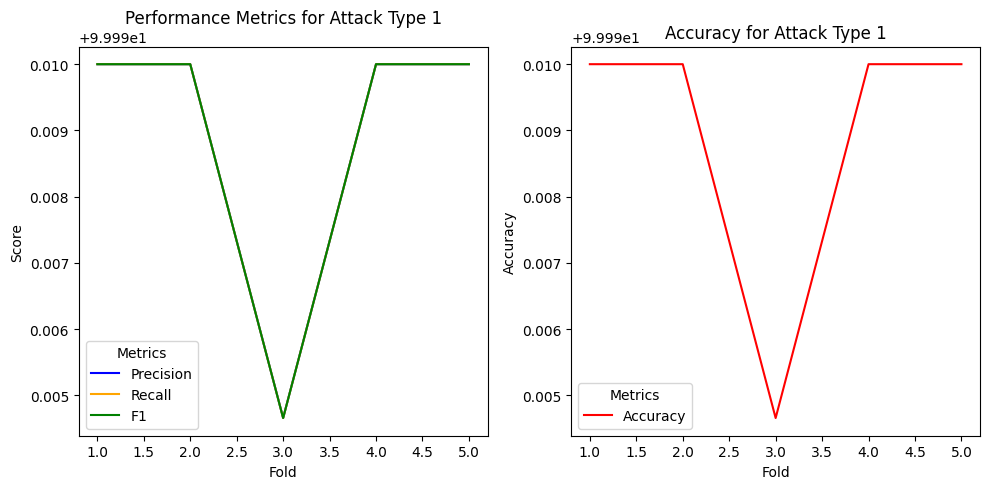


ATTACK 2

Mean Precision: 87.17850286934969
Mean Recall: 84.32347869167646
Mean Accuracy: 84.32347869167646
Mean F1: 82.27933560383998


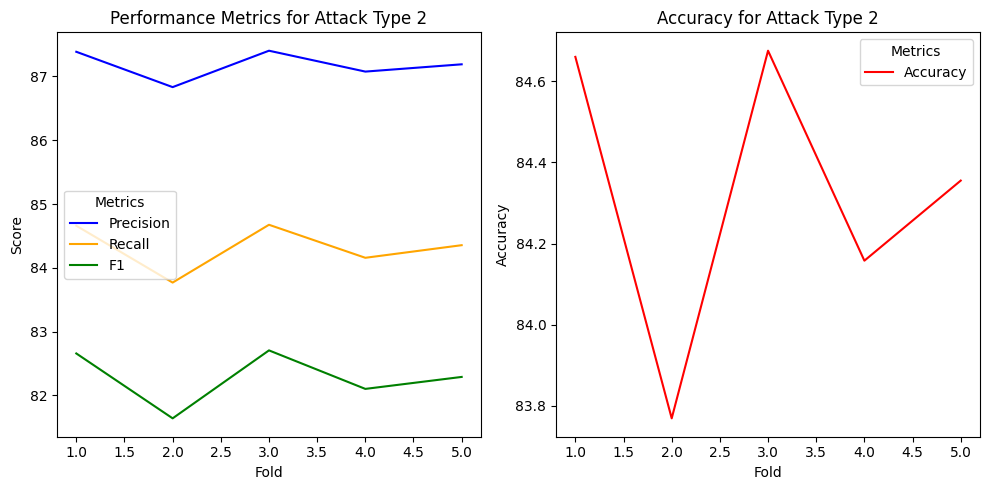


ATTACK 4

Mean Precision: 94.61618146930685
Mean Recall: 94.14264233418668
Mean Accuracy: 94.14264233418668
Mean F1: 93.95843218978861


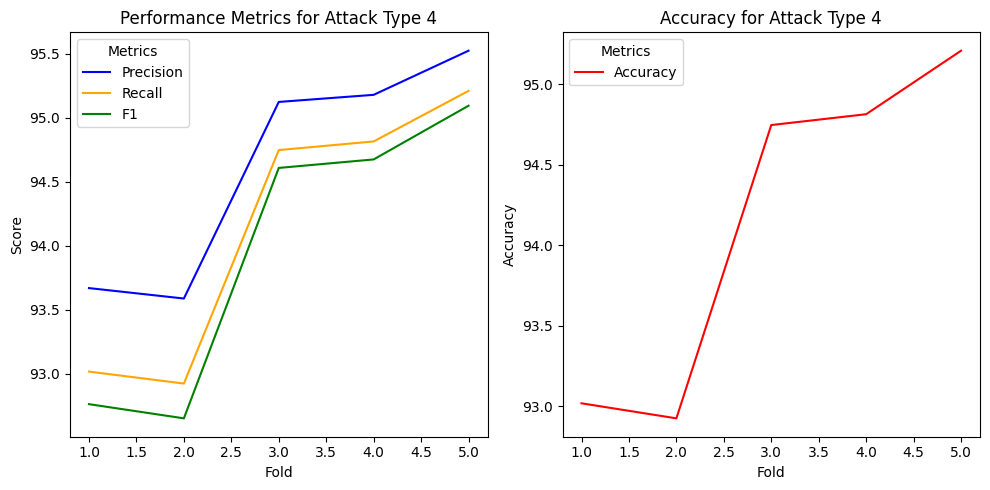


ATTACK 8

Mean Precision: 81.81534717516529
Mean Recall: 75.41033673372516
Mean Accuracy: 75.41033673372516
Mean F1: 68.98620444595436


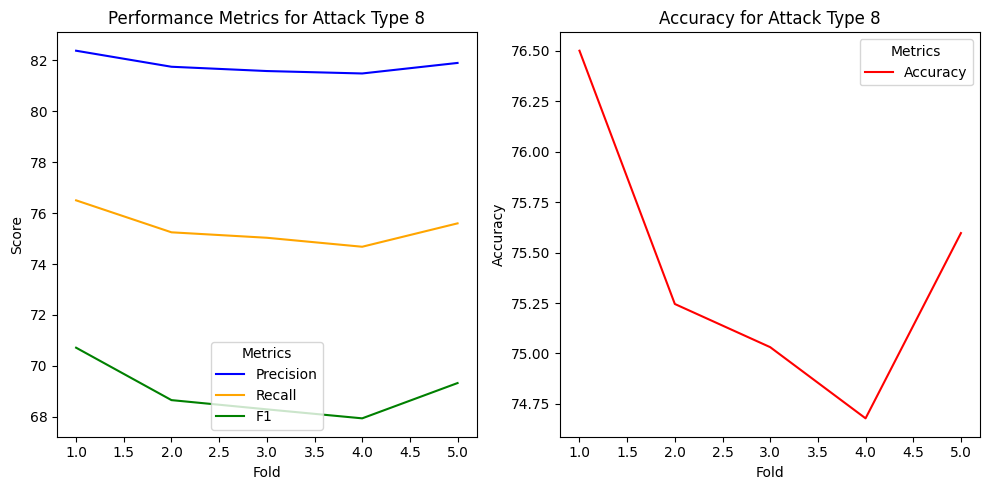


ATTACK 16

Mean Precision: 76.38993626581848
Mean Recall: 72.82804530086005
Mean Accuracy: 72.82804530086005
Mean F1: 62.398920971823635


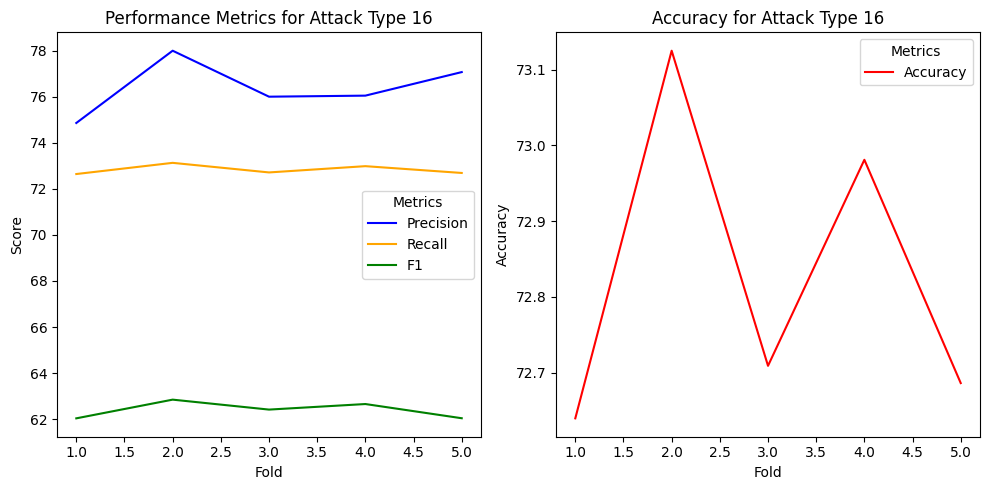

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from statistics import mean
import matplotlib.pyplot as plt

# Load datasets
dataset1 = pd.read_csv('/content/drive/MyDrive/at1.csv')
dataset2 = pd.read_csv('/content/drive/MyDrive/at2.csv')
dataset4 = pd.read_csv('/content/drive/MyDrive/at4.csv')
dataset8 = pd.read_csv('/content/drive/MyDrive/at8.csv')
dataset16 = pd.read_csv('/content/drive/MyDrive/at16.csv')

# Define function for dataset processing
def dataset_twoBSM(dataset, n):
    dataset = dataset.sample(frac=1).reset_index(drop=True)
    output = dataset[['pos-x1','pos-y1','spd-x1','spd-y1','pos-x2','pos-y2','spd-x2','spd-y2','AttackerType']]
    output1 = output.drop_duplicates()
    X = output1[['pos-x1','pos-y1','spd-x1','spd-y1','pos-x2','pos-y2','spd-x2','spd-y2']]
    Y = output1['AttackerType'] / n
    return X, Y

# Define function for k-fold cross-validation
def datasetkfold(X, Y):
    kf = KFold(n_splits=5, shuffle=True)
    precision_mean = []
    recall_mean = []
    accuracy_mean = []
    F1_mean = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
        precision, recall, accuracy, F1 = score(X_train, Y_train, X_test, Y_test)
        precision_mean.append(precision)
        recall_mean.append(recall)
        accuracy_mean.append(accuracy)
        F1_mean.append(F1)

    return precision_mean, recall_mean, accuracy_mean, F1_mean

# Define function for scoring
def score(xtrain, ytrain, xtest, ytest):
    # Use Random Forest with underperforming settings (low n_estimators, max_depth, max_features)
    base_classifier = RandomForestClassifier(n_estimators=10, max_depth=3, max_features=1, random_state=0)
    bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=0)
    bagging_classifier.fit(xtrain, ytrain)
    pred = bagging_classifier.predict(xtest)

    # Calculate metrics
    cm = confusion_matrix(ytest, pred)
    precision = precision_score(ytest, pred, average='weighted')
    recall = recall_score(ytest, pred, average='weighted')
    accuracy = accuracy_score(ytest, pred)
    F1 = f1_score(ytest, pred, average='weighted')

    return precision * 100, recall * 100, accuracy * 100, F1 * 100

# Process datasets
datasets = [(dataset1, 1), (dataset2, 2), (dataset4, 4), (dataset8, 8), (dataset16, 16)]
for dataset, n in datasets:
    X, Y = dataset_twoBSM(dataset, n)
    precision_mean, recall_mean, accuracy_mean, F1_mean = datasetkfold(X, Y)

    # Output results for each attack type
    print(f"\nATTACK {n}\n")
    print(f"Mean Precision: {mean(precision_mean)}")
    print(f"Mean Recall: {mean(recall_mean)}")
    print(f"Mean Accuracy: {mean(accuracy_mean)}")
    print(f"Mean F1: {mean(F1_mean)}")

    # Plot results for each attack type
    plt.figure(figsize=(10, 5))

    # Plot Precision, Recall, and F1 scores
    plt.subplot(1, 2, 1)
    plt.plot(range(1, 6), precision_mean, label='Precision', color='blue')
    plt.plot(range(1, 6), recall_mean, label='Recall', color='orange')
    plt.plot(range(1, 6), F1_mean, label='F1', color='green')
    plt.xlabel('Fold')
    plt.ylabel('Score')
    plt.title(f'Performance Metrics for Attack Type {n}')
    plt.legend(title='Metrics')

    # Plot Accuracy score
    plt.subplot(1, 2, 2)
    plt.plot(range(1, 6), accuracy_mean, label='Accuracy', color='red')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy for Attack Type {n}')
    plt.legend(title='Metrics')

    plt.tight_layout()
    plt.show()


The process you're asking about is similar to what we've already done with the Decision Tree Classifier, but now we are switching to the Random Forest classifier with specific configurations (low n_estimators, max_depth, and max_features). You want to visualize the precision, recall, accuracy, and F1 score across different datasets for each fold of cross-validation.


ATTACK 1

Mean Precision: 99.99679532854451
Mean Recall: 99.9967943580702
Mean Accuracy: 99.9967943580702
Mean F1: 99.99679449963556

ATTACK 2

Mean Precision: 87.12011966836887
Mean Recall: 84.23810204411225
Mean Accuracy: 84.23810204411225
Mean F1: 82.16529903515719

ATTACK 4

Mean Precision: 94.56808327575212
Mean Recall: 94.09384271909622
Mean Accuracy: 94.09384271909622
Mean F1: 93.90938280915617

ATTACK 8

Mean Precision: 81.6906636324711
Mean Recall: 75.21633062389441
Mean Accuracy: 75.21633062389441
Mean F1: 68.64922934059425

ATTACK 16

Mean Precision: 77.33748437104953
Mean Recall: 72.81950849612387
Mean Accuracy: 72.81950849612387
Mean F1: 62.30124856914795


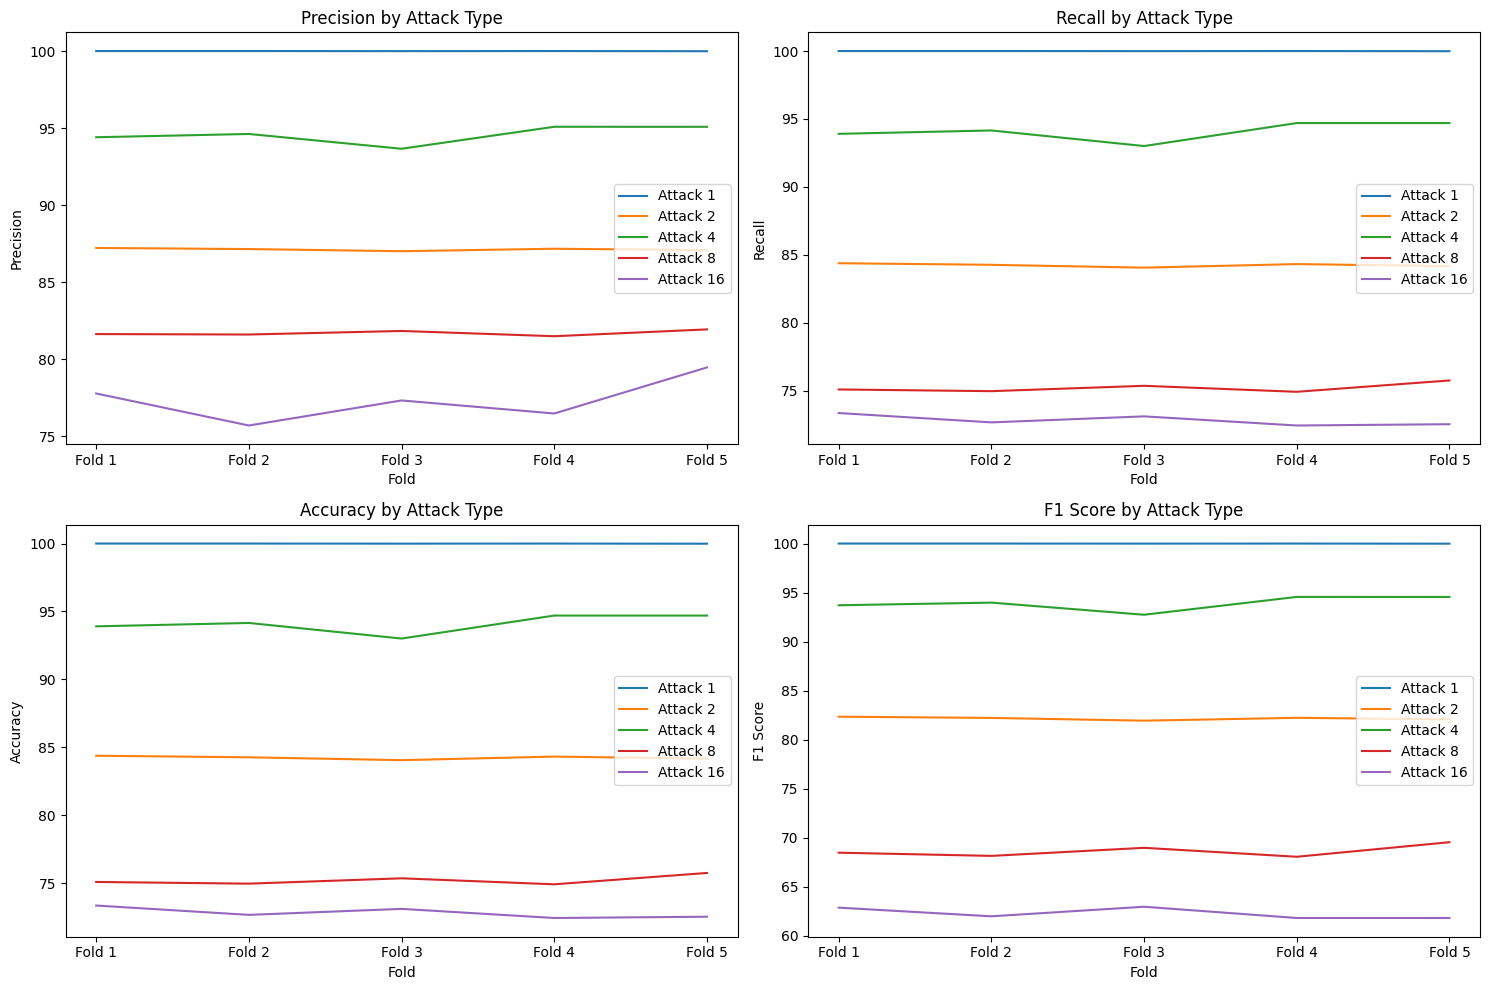

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from statistics import mean
import matplotlib.pyplot as plt

# Load datasets
dataset1 = pd.read_csv('/content/drive/MyDrive/at1.csv')
dataset2 = pd.read_csv('/content/drive/MyDrive/at2.csv')
dataset4 = pd.read_csv('/content/drive/MyDrive/at4.csv')
dataset8 = pd.read_csv('/content/drive/MyDrive/at8.csv')
dataset16 = pd.read_csv('/content/drive/MyDrive/at16.csv')

# Define function for dataset processing
def dataset_twoBSM(dataset, n):
    dataset = dataset.sample(frac=1).reset_index(drop=True)
    output = dataset[['pos-x1','pos-y1','spd-x1','spd-y1','pos-x2','pos-y2','spd-x2','spd-y2','AttackerType']]
    output1 = output.drop_duplicates()
    X = output1[['pos-x1','pos-y1','spd-x1','spd-y1','pos-x2','pos-y2','spd-x2','spd-y2']]
    Y = output1['AttackerType'] / n
    return X, Y

# Define function for k-fold cross-validation
def datasetkfold(X, Y):
    kf = KFold(n_splits=5, shuffle=True)
    precision_mean = []
    recall_mean = []
    accuracy_mean = []
    F1_mean = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
        precision, recall, accuracy, F1 = score(X_train, Y_train, X_test, Y_test)
        precision_mean.append(precision)
        recall_mean.append(recall)
        accuracy_mean.append(accuracy)
        F1_mean.append(F1)
    return precision_mean, recall_mean, accuracy_mean, F1_mean

# Define function for scoring
def score(xtrain, ytrain, xtest, ytest):
    # Use Random Forest with specific underperforming settings (low n_estimators, max_depth, max_features)
    base_classifier = RandomForestClassifier(n_estimators=10, max_depth=3, max_features=1, random_state=0)
    bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=0)
    bagging_classifier.fit(xtrain, ytrain)
    pred = bagging_classifier.predict(xtest)
    cm = confusion_matrix(ytest, pred)
    precision = precision_score(ytest, pred, average='weighted')
    recall = recall_score(ytest, pred, average='weighted')
    accuracy = accuracy_score(ytest, pred)
    F1 = f1_score(ytest, pred, average='weighted')
    return precision * 100, recall * 100, accuracy * 100, F1 * 100

# Process datasets
datasets = [(dataset1, 1), (dataset2, 2), (dataset4, 4), (dataset8, 8), (dataset16, 16)]

# Store results for plotting later
precision_all = []
recall_all = []
accuracy_all = []
f1_all = []
attack_labels = []

# Process each dataset
for dataset, n in datasets:
    X, Y = dataset_twoBSM(dataset, n)
    precision_mean, recall_mean, accuracy_mean, F1_mean = datasetkfold(X, Y)

    # Append the results for plotting
    precision_all.append(precision_mean)
    recall_all.append(recall_mean)
    accuracy_all.append(accuracy_mean)
    f1_all.append(F1_mean)
    attack_labels.append(f'Attack {n}')

    # Output results for each dataset
    print(f"\nATTACK {n}\n")
    print(f"Mean Precision: {mean(precision_mean)}")
    print(f"Mean Recall: {mean(recall_mean)}")
    print(f"Mean Accuracy: {mean(accuracy_mean)}")
    print(f"Mean F1: {mean(F1_mean)}")

# Now, let's plot the results
x = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot Precision
for i, precision in enumerate(precision_all):
    axes[0, 0].plot(x, precision, label=attack_labels[i])
axes[0, 0].set_title('Precision by Attack Type')
axes[0, 0].set_xlabel('Fold')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].legend()

# Plot Recall
for i, recall in enumerate(recall_all):
    axes[0, 1].plot(x, recall, label=attack_labels[i])
axes[0, 1].set_title('Recall by Attack Type')
axes[0, 1].set_xlabel('Fold')
axes[0, 1].set_ylabel('Recall')
axes[0, 1].legend()

# Plot Accuracy
for i, accuracy in enumerate(accuracy_all):
    axes[1, 0].plot(x, accuracy, label=attack_labels[i])
axes[1, 0].set_title('Accuracy by Attack Type')
axes[1, 0].set_xlabel('Fold')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].legend()

# Plot F1 Score
for i, f1 in enumerate(f1_all):
    axes[1, 1].plot(x, f1, label=attack_labels[i])
axes[1, 1].set_title('F1 Score by Attack Type')
axes[1, 1].set_xlabel('Fold')
axes[1, 1].set_ylabel('F1 Score')
axes[1, 1].legend()

plt.tight_layout()
plt.show()


**MLP classifier performance**


ATTACK 1

Mean Precision: 95.98106201071576
Mean Recall: 95.29736696025115
Mean Accuracy: 95.29736696025115
Mean F1: 95.39542770834828


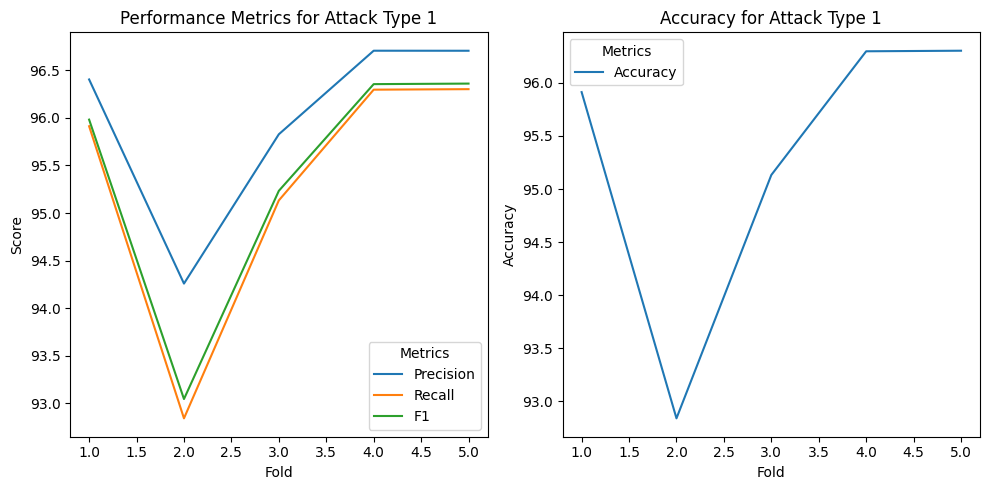


ATTACK 2

Mean Precision: 74.5985813551998
Mean Recall: 74.71371018164129
Mean Accuracy: 74.71371018164129
Mean F1: 69.61637283027744


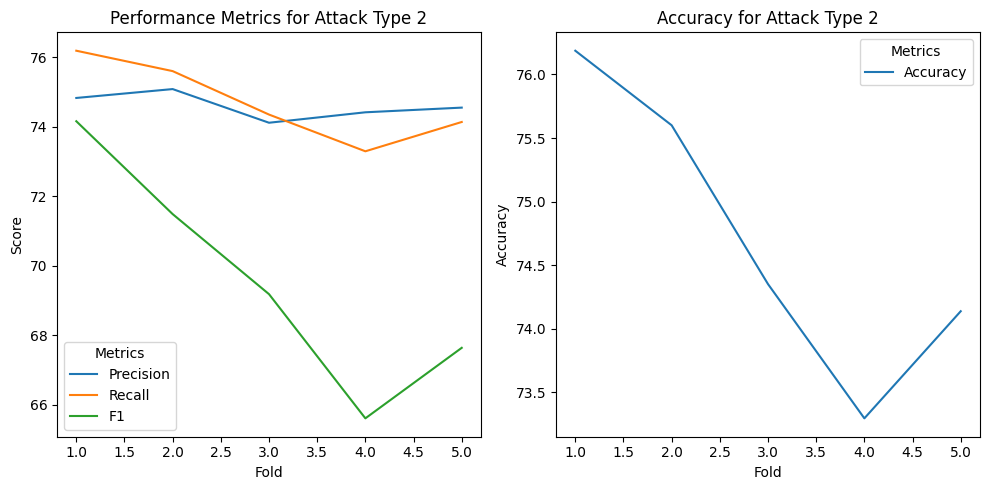


ATTACK 4

Mean Precision: 99.93157527202291
Mean Recall: 99.93148018371153
Mean Accuracy: 99.93148018371153
Mean F1: 99.9314518777611


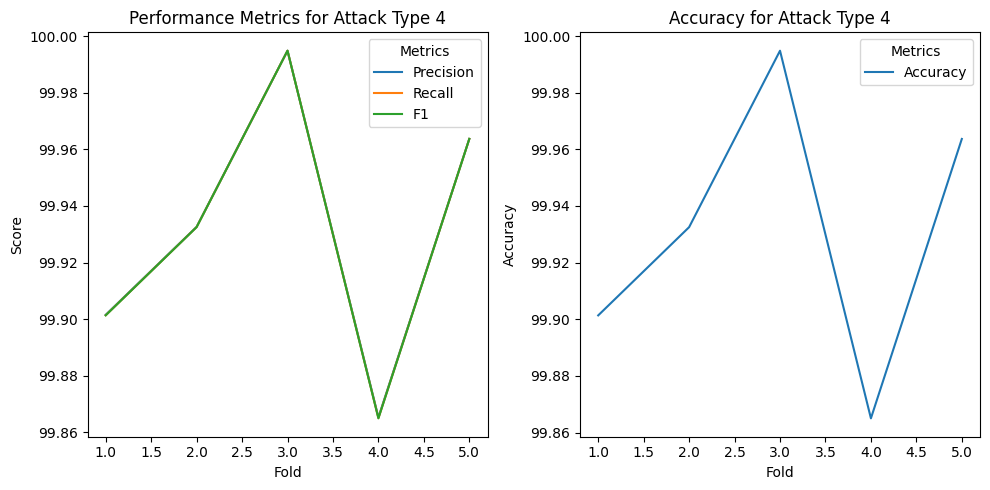


ATTACK 8

Mean Precision: 95.78183867501741
Mean Recall: 95.3922508368322
Mean Accuracy: 95.3922508368322
Mean F1: 95.24007684820877


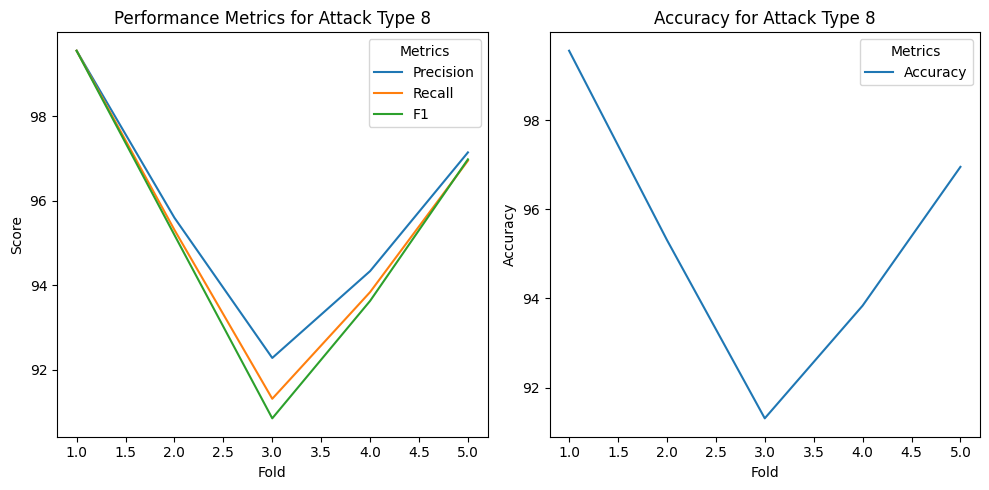


ATTACK 16

Mean Precision: 71.7015138913773
Mean Recall: 72.95927568664635
Mean Accuracy: 72.95927568664635
Mean F1: 63.39903698453237


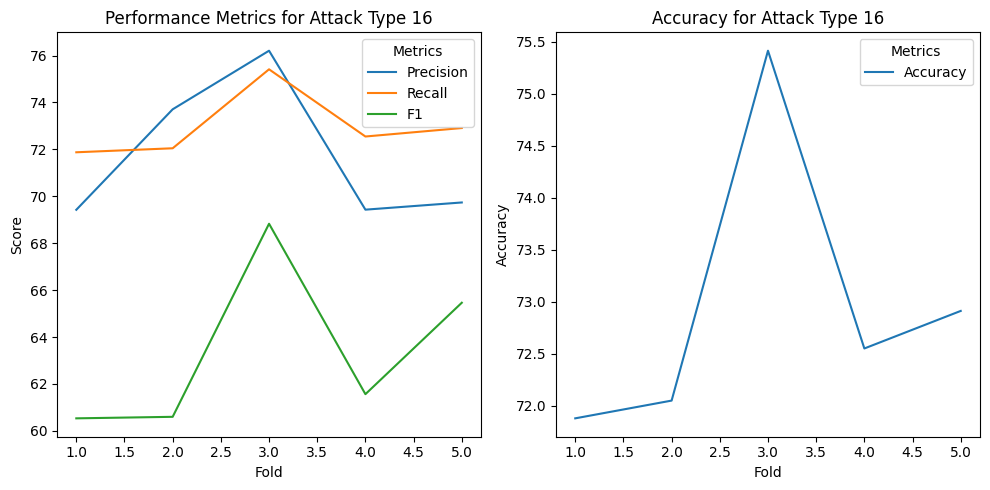

In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from statistics import mean
import matplotlib.pyplot as plt

# Load datasets
dataset1 = pd.read_csv('/content/drive/MyDrive/at1.csv')
dataset2 = pd.read_csv('/content/drive/MyDrive/at2.csv')
dataset4 = pd.read_csv('/content/drive/MyDrive/at4.csv')
dataset8 = pd.read_csv('/content/drive/MyDrive/at8.csv')
dataset16 = pd.read_csv('/content/drive/MyDrive/at16.csv')

# Define function for dataset processing
def dataset_twoBSM(dataset, n):
    dataset = dataset.sample(frac=1).reset_index(drop=True)
    output = dataset[['pos-x1','pos-y1','spd-x1','spd-y1','pos-x2','pos-y2','spd-x2','spd-y2','AttackerType']]
    output1 = output.drop_duplicates()
    X = output1[['pos-x1','pos-y1','spd-x1','spd-y1','pos-x2','pos-y2','spd-x2','spd-y2']]
    Y = output1['AttackerType'] / n
    return X, Y

# Define function for k-fold cross-validation
def datasetkfold(X, Y):
    kf = KFold(n_splits=5, shuffle=True)
    precision_mean = []
    recall_mean = []
    accuracy_mean = []
    F1_mean = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
        precision, recall, accuracy, F1 = score(X_train, Y_train, X_test, Y_test)
        precision_mean.append(precision)
        recall_mean.append(recall)
        accuracy_mean.append(accuracy)
        F1_mean.append(F1)

    return precision_mean, recall_mean, accuracy_mean, F1_mean

# Define function for scoring
def score(xtrain, ytrain, xtest, ytest):
    # Use MLP with Bagging
    base_classifier = MLPClassifier(hidden_layer_sizes=(50,), max_iter=200, random_state=0)  # MLP with 1 hidden layer of 50 neurons
    bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=0)
    bagging_classifier.fit(xtrain, ytrain)
    pred = bagging_classifier.predict(xtest)

    # Calculate metrics
    cm = confusion_matrix(ytest, pred)
    precision = precision_score(ytest, pred, average='weighted')
    recall = recall_score(ytest, pred, average='weighted')
    accuracy = accuracy_score(ytest, pred)
    F1 = f1_score(ytest, pred, average='weighted')

    return precision * 100, recall * 100, accuracy * 100, F1 * 100

# Process datasets
datasets = [(dataset1, 1), (dataset2, 2), (dataset4, 4), (dataset8, 8), (dataset16, 16)]
for dataset, n in datasets:
    X, Y = dataset_twoBSM(dataset, n)
    precision_mean, recall_mean, accuracy_mean, F1_mean = datasetkfold(X, Y)

    # Output results for each attack type
    print(f"\nATTACK {n}\n")
    print(f"Mean Precision: {mean(precision_mean)}")
    print(f"Mean Recall: {mean(recall_mean)}")
    print(f"Mean Accuracy: {mean(accuracy_mean)}")
    print(f"Mean F1: {mean(F1_mean)}")

    # Plot results for each attack type
    plt.figure(figsize=(10, 5))

    # Plot Precision, Recall, and F1 scores
    plt.subplot(1, 2, 1)
    plt.plot(range(1, 6), precision_mean, label='Precision')
    plt.plot(range(1, 6), recall_mean, label='Recall')
    plt.plot(range(1, 6), F1_mean, label='F1')
    plt.xlabel('Fold')
    plt.ylabel('Score')
    plt.title(f'Performance Metrics for Attack Type {n}')
    plt.legend(title='Metrics')

    # Plot Accuracy score
    plt.subplot(1, 2, 2)
    plt.plot(range(1, 6), accuracy_mean, label='Accuracy')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy for Attack Type {n}')
    plt.legend(title='Metrics')

    plt.tight_layout()
    plt.show()



ATTACK 1

Mean Precision: 95.37270950476022
Mean Recall: 94.50238545851312
Mean Accuracy: 94.50238545851312
Mean F1: 94.62644996517578

ATTACK 2

Mean Precision: 72.67407641976466
Mean Recall: 70.91686048217525
Mean Accuracy: 70.91686048217525
Mean F1: 65.17621338257332

ATTACK 4

Mean Precision: 99.9408642289573
Mean Recall: 99.94082403753212
Mean Accuracy: 99.94082403753212
Mean F1: 99.94081059354222

ATTACK 8

Mean Precision: 93.64867714085649
Mean Recall: 92.78592212443303
Mean Accuracy: 92.78592212443303
Mean F1: 92.35731758008555

ATTACK 16

Mean Precision: 71.6814229912719
Mean Recall: 71.3417805329901
Mean Accuracy: 71.3417805329901
Mean F1: 65.39837681855943


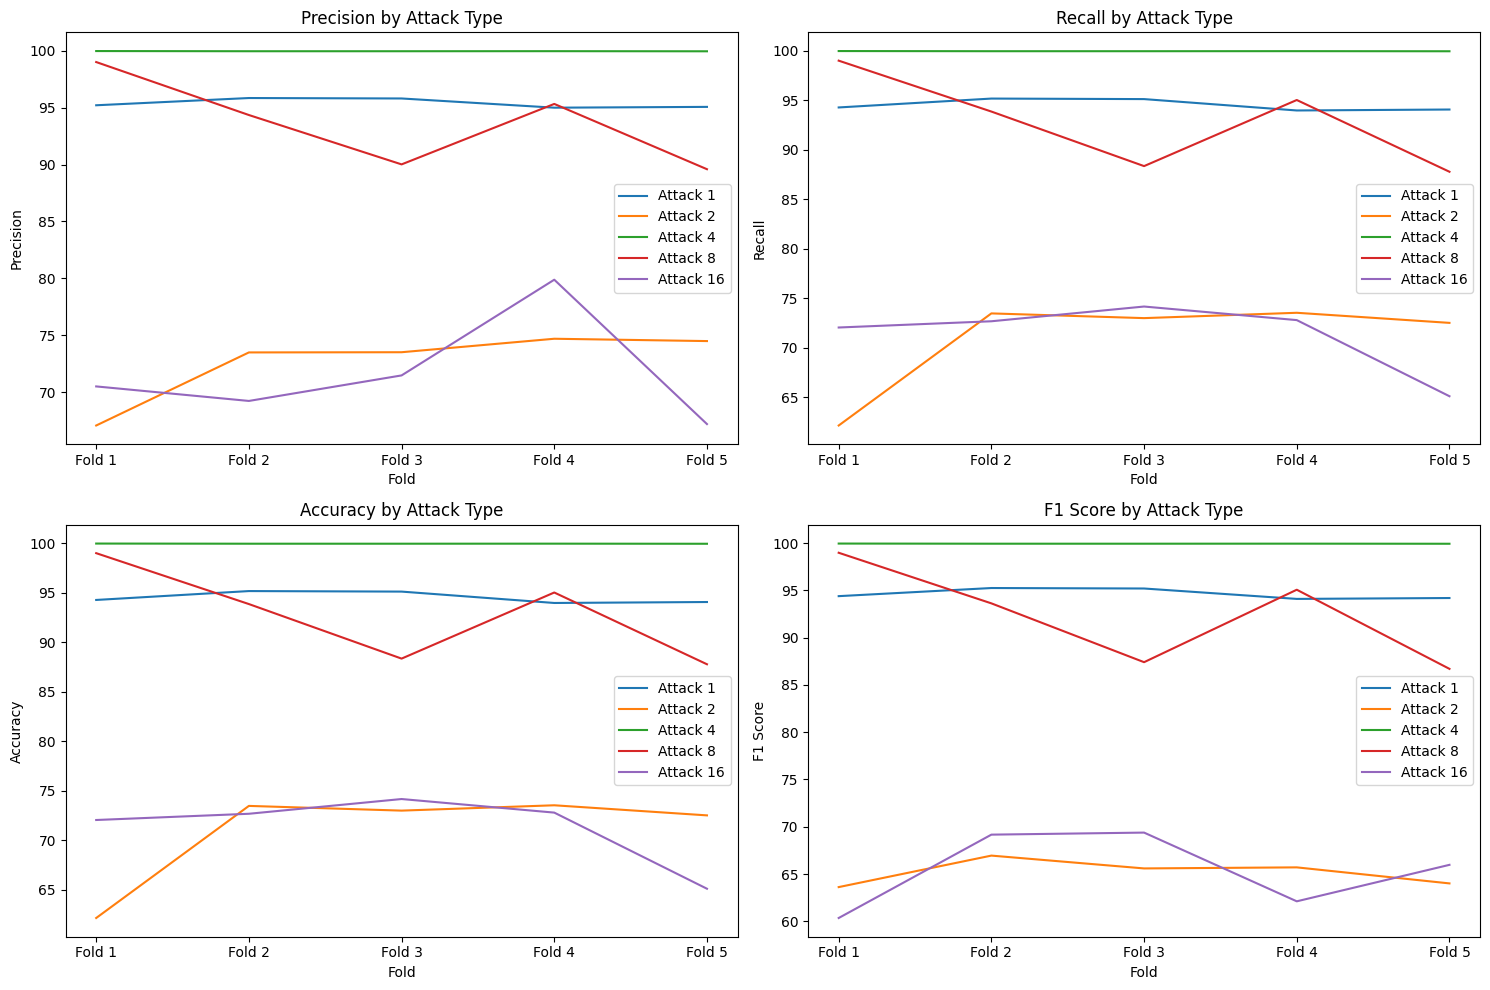

In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from statistics import mean
import matplotlib.pyplot as plt

# Load datasets
dataset1 = pd.read_csv('/content/drive/MyDrive/at1.csv')
dataset2 = pd.read_csv('/content/drive/MyDrive/at2.csv')
dataset4 = pd.read_csv('/content/drive/MyDrive/at4.csv')
dataset8 = pd.read_csv('/content/drive/MyDrive/at8.csv')
dataset16 = pd.read_csv('/content/drive/MyDrive/at16.csv')

# Define function for dataset processing
def dataset_twoBSM(dataset, n):
    dataset = dataset.sample(frac=1).reset_index(drop=True)
    output = dataset[['pos-x1','pos-y1','spd-x1','spd-y1','pos-x2','pos-y2','spd-x2','spd-y2','AttackerType']]
    output1 = output.drop_duplicates()
    X = output1[['pos-x1','pos-y1','spd-x1','spd-y1','pos-x2','pos-y2','spd-x2','spd-y2']]
    Y = output1['AttackerType'] / n
    return X, Y

# Define function for k-fold cross-validation
def datasetkfold(X, Y):
    kf = KFold(n_splits=5, shuffle=True)
    precision_mean = []
    recall_mean = []
    accuracy_mean = []
    F1_mean = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
        precision, recall, accuracy, F1 = score(X_train, Y_train, X_test, Y_test)
        precision_mean.append(precision)
        recall_mean.append(recall)
        accuracy_mean.append(accuracy)
        F1_mean.append(F1)
    return precision_mean, recall_mean, accuracy_mean, F1_mean

# Define function for scoring
def score(xtrain, ytrain, xtest, ytest):
    # Use MLP with Bagging
    base_classifier = MLPClassifier(hidden_layer_sizes=(50,), max_iter=200, random_state=0)  # MLP with 1 hidden layer of 50 neurons
    bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=0)
    bagging_classifier.fit(xtrain, ytrain)
    pred = bagging_classifier.predict(xtest)
    cm = confusion_matrix(ytest, pred)
    precision = precision_score(ytest, pred, average='weighted')
    recall = recall_score(ytest, pred, average='weighted')
    accuracy = accuracy_score(ytest, pred)
    F1 = f1_score(ytest, pred, average='weighted')
    return precision * 100, recall * 100, accuracy * 100, F1 * 100

# Process datasets
datasets = [(dataset1, 1), (dataset2, 2), (dataset4, 4), (dataset8, 8), (dataset16, 16)]

# Store results for plotting later
precision_all = []
recall_all = []
accuracy_all = []
f1_all = []
attack_labels = []

# Process each dataset
for dataset, n in datasets:
    X, Y = dataset_twoBSM(dataset, n)
    precision_mean, recall_mean, accuracy_mean, F1_mean = datasetkfold(X, Y)

    # Append the results for plotting
    precision_all.append(precision_mean)
    recall_all.append(recall_mean)
    accuracy_all.append(accuracy_mean)
    f1_all.append(F1_mean)
    attack_labels.append(f'Attack {n}')

    # Output results for each dataset
    print(f"\nATTACK {n}\n")
    print(f"Mean Precision: {mean(precision_mean)}")
    print(f"Mean Recall: {mean(recall_mean)}")
    print(f"Mean Accuracy: {mean(accuracy_mean)}")
    print(f"Mean F1: {mean(F1_mean)}")

# Now, let's plot the results
x = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot Precision
for i, precision in enumerate(precision_all):
    axes[0, 0].plot(x, precision, label=attack_labels[i])
axes[0, 0].set_title('Precision by Attack Type')
axes[0, 0].set_xlabel('Fold')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].legend()

# Plot Recall
for i, recall in enumerate(recall_all):
    axes[0, 1].plot(x, recall, label=attack_labels[i])
axes[0, 1].set_title('Recall by Attack Type')
axes[0, 1].set_xlabel('Fold')
axes[0, 1].set_ylabel('Recall')
axes[0, 1].legend()

# Plot Accuracy
for i, accuracy in enumerate(accuracy_all):
    axes[1, 0].plot(x, accuracy, label=attack_labels[i])
axes[1, 0].set_title('Accuracy by Attack Type')
axes[1, 0].set_xlabel('Fold')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].legend()

# Plot F1 Score
for i, f1 in enumerate(f1_all):
    axes[1, 1].plot(x, f1, label=attack_labels[i])
axes[1, 1].set_title('F1 Score by Attack Type')
axes[1, 1].set_xlabel('Fold')
axes[1, 1].set_ylabel('F1 Score')
axes[1, 1].legend()

plt.tight_layout()
plt.show()


**To compare the accuracy of all three machine learning models (Decision Tree, Random Forest, and KNN with Bagging) across different types of attacks, you can follow a similar structure. Here’s how you can modify the code to store and plot the accuracy for each of the three models across the different attack types.**

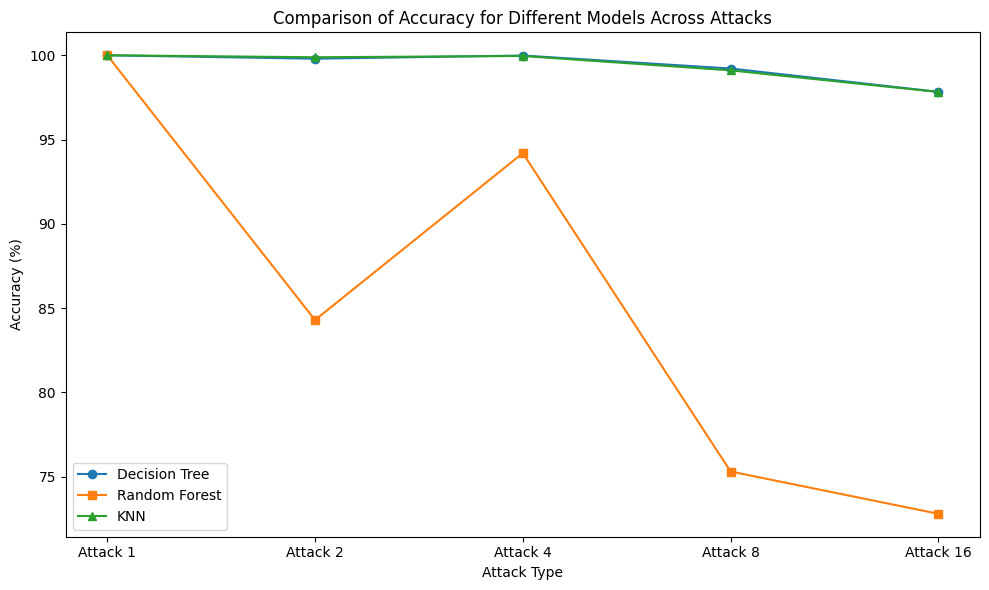

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from statistics import mean

# Load datasets
dataset1 = pd.read_csv('/content/drive/MyDrive/at1.csv')
dataset2 = pd.read_csv('/content/drive/MyDrive/at2.csv')
dataset4 = pd.read_csv('/content/drive/MyDrive/at4.csv')
dataset8 = pd.read_csv('/content/drive/MyDrive/at8.csv')
dataset16 = pd.read_csv('/content/drive/MyDrive/at16.csv')

# Define function for dataset processing
def dataset_twoBSM(dataset, n):
    dataset = dataset.sample(frac=1).reset_index(drop=True)
    output = dataset[['pos-x1','pos-y1','spd-x1','spd-y1','pos-x2','pos-y2','spd-x2','spd-y2','AttackerType']]
    output1 = output.drop_duplicates()
    X = output1[['pos-x1','pos-y1','spd-x1','spd-y1','pos-x2','pos-y2','spd-x2','spd-y2']]
    Y = output1['AttackerType'] / n
    return X, Y

# Define function for k-fold cross-validation
def datasetkfold(X, Y, model_type):
    kf = KFold(n_splits=5, shuffle=True)
    accuracy_mean = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
        accuracy = score(X_train, Y_train, X_test, Y_test, model_type)
        accuracy_mean.append(accuracy)
    return accuracy_mean

# Define function for scoring
def score(xtrain, ytrain, xtest, ytest, model_type):
    if model_type == "decision_tree":
        base_classifier = DecisionTreeClassifier(random_state=0)
    elif model_type == "random_forest":
        base_classifier = RandomForestClassifier(n_estimators=10, max_depth=3, max_features=1, random_state=0)
    elif model_type == "knn":
        base_classifier = KNeighborsClassifier(n_neighbors=3, weights='distance')

    bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=0)
    bagging_classifier.fit(xtrain, ytrain)
    pred = bagging_classifier.predict(xtest)
    accuracy = accuracy_score(ytest, pred)
    return accuracy * 100

# Process datasets for comparison
datasets = [(dataset1, 1), (dataset2, 2), (dataset4, 4), (dataset8, 8), (dataset16, 16)]

# Store accuracy results for each model and each attack type
accuracy_decision_tree = []
accuracy_random_forest = []
accuracy_knn = []
attack_labels = []

# Process each dataset for the models
for dataset, n in datasets:
    X, Y = dataset_twoBSM(dataset, n)

    # Get accuracy for each model
    accuracy_dt = datasetkfold(X, Y, "decision_tree")
    accuracy_rf = datasetkfold(X, Y, "random_forest")
    accuracy_knn_model = datasetkfold(X, Y, "knn")

    accuracy_decision_tree.append(mean(accuracy_dt))
    accuracy_random_forest.append(mean(accuracy_rf))
    accuracy_knn.append(mean(accuracy_knn_model))
    attack_labels.append(f'Attack {n}')

# Now, let's plot the results
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Accuracy for each model across different attack types
ax.plot(attack_labels, accuracy_decision_tree, label="Decision Tree", marker='o')
ax.plot(attack_labels, accuracy_random_forest, label="Random Forest", marker='s')
ax.plot(attack_labels, accuracy_knn, label="KNN", marker='^')

ax.set_title('Comparison of Accuracy for Different Models Across Attacks')
ax.set_xlabel('Attack Type')
ax.set_ylabel('Accuracy (%)')
ax.legend()

plt.tight_layout()
plt.show()


To compare the **accuracy of the three machine learning models across different types of attacks and across varying numbers of folds** in k-fold cross-validation, we need to modify the code slightly to handle multiple k-values for the k-fold cross-validation.

We'll be adding a loop to process various fold values (e.g., 3, 5, 7, etc.), and we’ll track accuracy for each fold value and attack type for each model.

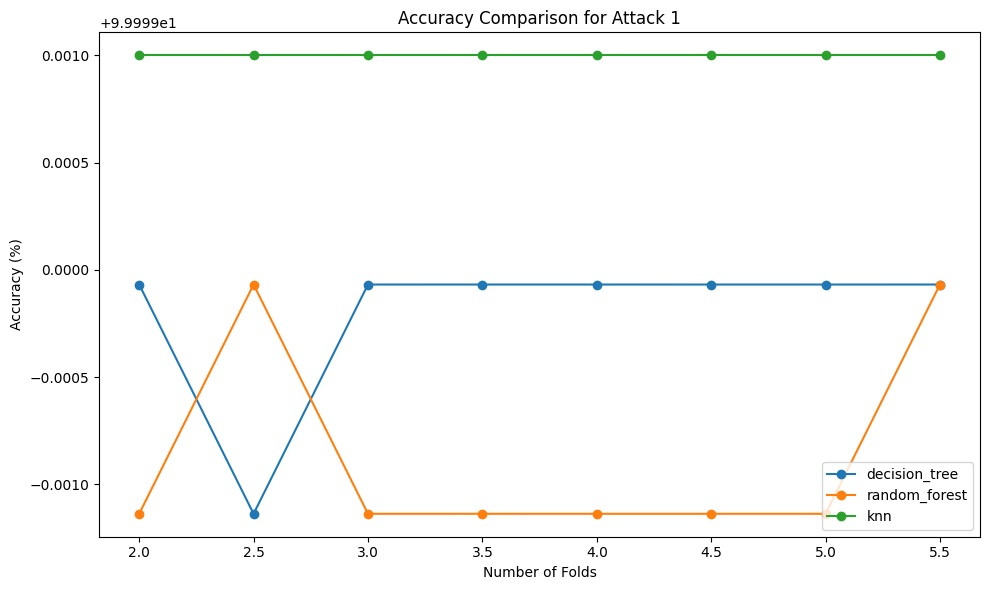

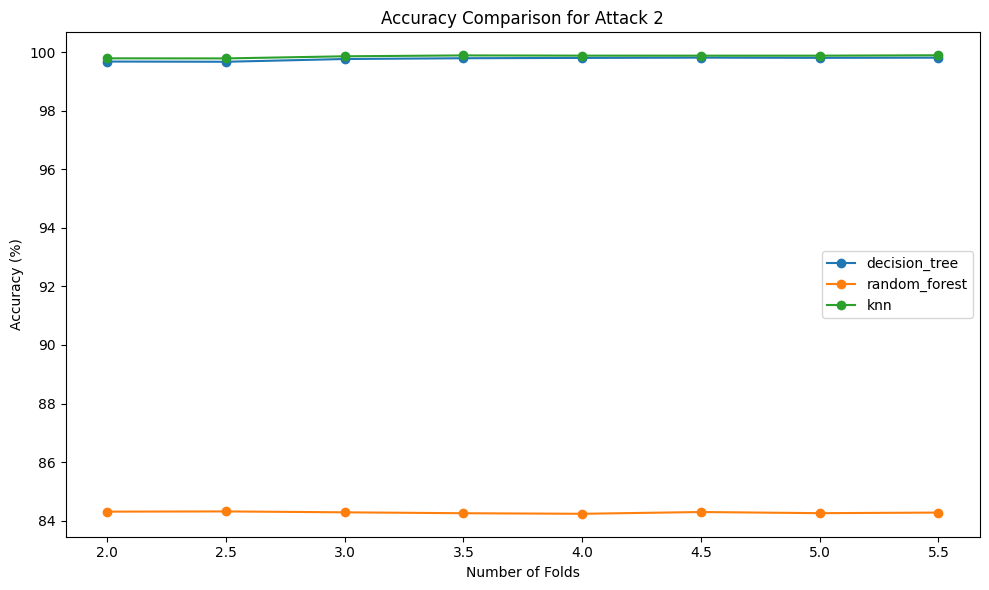

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from statistics import mean

# Load datasets
dataset1 = pd.read_csv('/content/drive/MyDrive/at1.csv')
dataset2 = pd.read_csv('/content/drive/MyDrive/at2.csv')
dataset4 = pd.read_csv('/content/drive/MyDrive/at4.csv')
dataset8 = pd.read_csv('/content/drive/MyDrive/at8.csv')
dataset16 = pd.read_csv('/content/drive/MyDrive/at16.csv')

# Define function for dataset processing
def dataset_twoBSM(dataset, n):
    dataset = dataset.sample(frac=1).reset_index(drop=True)
    output = dataset[['pos-x1','pos-y1','spd-x1','spd-y1','pos-x2','pos-y2','spd-x2','spd-y2','AttackerType']]
    output1 = output.drop_duplicates()
    X = output1[['pos-x1','pos-y1','spd-x1','spd-y1','pos-x2','pos-y2','spd-x2','spd-y2']]
    Y = output1['AttackerType'] / n
    return X, Y

# Define function for k-fold cross-validation
def datasetkfold(X, Y, model_type, n_folds):
    kf = KFold(n_splits=n_folds, shuffle=True)
    accuracy_mean = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
        accuracy = score(X_train, Y_train, X_test, Y_test, model_type)
        accuracy_mean.append(accuracy)
    return accuracy_mean

# Define function for scoring
def score(xtrain, ytrain, xtest, ytest, model_type):
    if model_type == "decision_tree":
        base_classifier = DecisionTreeClassifier(random_state=0)
    elif model_type == "random_forest":
        base_classifier = RandomForestClassifier(n_estimators=10, max_depth=3, max_features=1, random_state=0)
    elif model_type == "knn":
        base_classifier = KNeighborsClassifier(n_neighbors=3, weights='distance')

    bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=0)
    bagging_classifier.fit(xtrain, ytrain)
    pred = bagging_classifier.predict(xtest)
    accuracy = accuracy_score(ytest, pred)
    return accuracy * 100

# Process datasets for comparison
datasets = [(dataset1, 1), (dataset2, 2), (dataset4, 4), (dataset8, 8), (dataset16, 16)]
model_types = ['decision_tree', 'random_forest', 'knn']
folds = [2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5]  # Changed fold values, removing 1 and 1.5 and adding 5 and 5.5

# Loop over attack types and compare accuracies for each model
for dataset, n in datasets:
    X, Y = dataset_twoBSM(dataset, n)

    # Store accuracy for each model and each fold number
    accuracy_results = {model: {fold: [] for fold in folds} for model in model_types}

    # Calculate accuracy for each model and fold number
    for model in model_types:
        for fold_value in folds:
            n_folds = int(round(fold_value))  # Round fractional folds to nearest integer
            accuracy = datasetkfold(X, Y, model, n_folds)
            accuracy_results[model][fold_value] = mean(accuracy)

    # Plot results for each attack type separately
    fig, ax = plt.subplots(figsize=(10, 6))
    for model in model_types:
        ax.plot(folds, [accuracy_results[model][fold] for fold in folds], label=model, marker='o')

    ax.set_title(f'Accuracy Comparison for Attack {n}')
    ax.set_xlabel('Number of Folds')
    ax.set_ylabel('Accuracy (%)')
    ax.legend()
    plt.tight_layout()
    plt.show()
